# LW paper's figures

The figures to be used in the longwave paper are generated in this notebook.  Matplotlib is used in place of Bokeh, as it's easier to output to pdf, and interactive plots aren't really needed for this.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import os
import pymongo
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator
                                                                
from climatools.atm import *
from climatools.parameters import *
from climatools.dataset import *
from climatools.pymongo import *

import climatools.plot.plot as climaviz

from IPython import display                                                                                                                                                                                             

In [2]:
client = pymongo.MongoClient('localhost', 27017)

In [3]:
COMMITNUMBER = '1013f91'

In [4]:
ATMPRO = dict(mls=294, saw=257, trp=300)

# Figure 1

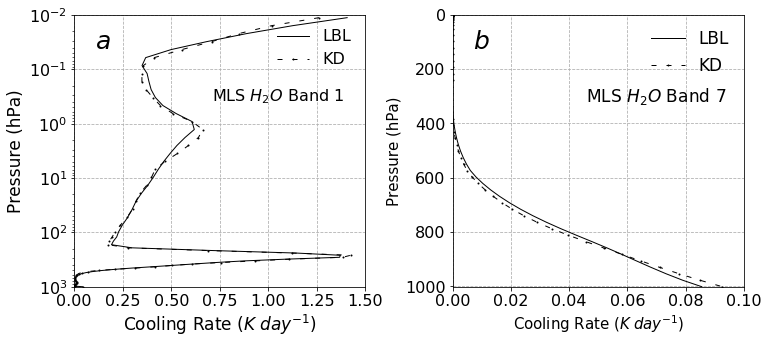

In [6]:
atmpro = 'mls'

atmcomp1 = AtmComposition.cliradlw_nongreys(onlygas='h2o', onlyband=1)
parms_lbl1 = atmcomp1.to_lblnewparam(nv=1000, dv=.001, atmpro=atmpro, tsfc=ATMPRO[atmpro])
datas_lbl1 = [p.modeldata_pymongo(collection=client.lblnew.bestfit_lw) for p in parms_lbl1]
d1 = datas_lbl1[0]
cool_lbl1 = d1.crd_cool.sum('g')['coolrg']
cool_wgt1 = d1.wgt_cool.sum('g').sel(igg=10)['coolrg']
cool_lbl1 = cool_lbl1[cool_lbl1.pressure > 1e-2]
cool_wgt1 = cool_wgt1[cool_wgt1.pressure > 1e-2]

atmcomp7 = AtmComposition.cliradlw_nongreys(onlygas='h2o', onlyband=7)
parms_lbl7 = atmcomp7.to_lblnewparam(nv=1000, dv=.001, atmpro=atmpro, tsfc=ATMPRO[atmpro])
datas_lbl7 = [p.modeldata_pymongo(collection=client.lblnew.bestfit_lw) for p in parms_lbl7]
d7 = datas_lbl7[0]
cool_lbl7 = d7.crd_cool.sum('g')['coolrg']
cool_wgt7 = d7.wgt_cool.sum('g').sel(igg=10)['coolrg']
cool_lbl7 = cool_lbl7[cool_lbl7.pressure > 1e-2]
cool_wgt7 = cool_wgt7[cool_wgt7.pressure > 1e-2]



fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

cool_lbl1.climaviz.plot(ax=axs[0], index_on_yaxis=True, varlim_from_indexrange=(1e-2, 1e3),
                        yincrease=False, yscale='log',
                        color='black', linestyle='-', linewidth=1, marker=None, markersize=8, alpha=1,
                        label='LBL')

cool_wgt1.climaviz.plot(ax=axs[0], index_on_yaxis=True, varlim_from_indexrange=(1e-2, 1e3),
                        yincrease=False, yscale='log',
                        color='black', linestyle=(0, (5, 10)), linewidth=1, marker='.', markersize=2, alpha=1,
                        label='KD')

axs[0].grid(b=True, linestyle='--')
axs[0].set_title(None)
axs[0].set_ylabel('Pressure (hPa)', fontsize=17)
axs[0].set_ylim(bottom=1e3, top=1e-2)
axs[0].set_xlabel('Cooling Rate $(K \; day^{-1})$', fontsize=17)
axs[0].get_xaxis().get_major_formatter().set_scientific(False)
axs[0].set_xlim(left=0, right=1.5)
axs[0].tick_params(labelsize=16)
axs[0].text(x=.1, y=.9, s='$a$', fontsize=25,
           verticalalignment='center', horizontalalignment='center', transform=axs[0].transAxes)
axs[0].text(x=.7, y=.7, s="MLS $H_2O$ Band 1", fontsize=16,
            verticalalignment='center', horizontalalignment='center', transform=axs[0].transAxes)
axs[0].legend(loc='upper right', frameon=False, fontsize=16)


cool_lbl7.climaviz.plot(ax=axs[1], index_on_yaxis=True, varlim_from_indexrange=(1e-2, 1e3),
                       yincrease=False, yscale='log',
                       color='black', linestyle='-', linewidth=1, marker=None, markersize=8, alpha=1,
                       label='LBL')

cool_wgt7.climaviz.plot(ax=axs[1], index_on_yaxis=True, varlim_from_indexrange=(1e-2, 1e3),
                       yincrease=False, yscale='linear',
                       color='black', linestyle=(0, (5, 10)), linewidth=1, marker='.', markersize=2, alpha=1,
                       label='KD')

axs[1].grid(b=True, linestyle='--')
axs[1].set_title(None)
axs[1].set_ylabel('Pressure (hPa)', fontsize=15)
axs[1].get_yaxis().get_major_formatter().set_scientific(False)
axs[1].set_xlabel('Cooling Rate $(K \; day^{-1})$', fontsize=15)
axs[1].get_xaxis().get_major_formatter().set_scientific(False)
axs[1].set_xlim(left=0, right=.1)
axs[1].tick_params(labelsize=16)
axs[1].text(x=.1, y=.9, s='$b$', fontsize=25,
            verticalalignment='center', horizontalalignment='center', transform=axs[1].transAxes)
axs[1].text(x=.7, y=.7, s='MLS $H_2O$ Band 7', fontsize=17,
            verticalalignment='center', horizontalalignment='center', transform=axs[1].transAxes)
axs[1].legend(loc='upper right', frameon=False, fontsize=17)

plt.subplots_adjust(wspace=.3)

fig.savefig('LWpaper_figure01.pdf', bbox_inches='tight')

# Figures 2, 3, 4, 5, 6

## Figure 2

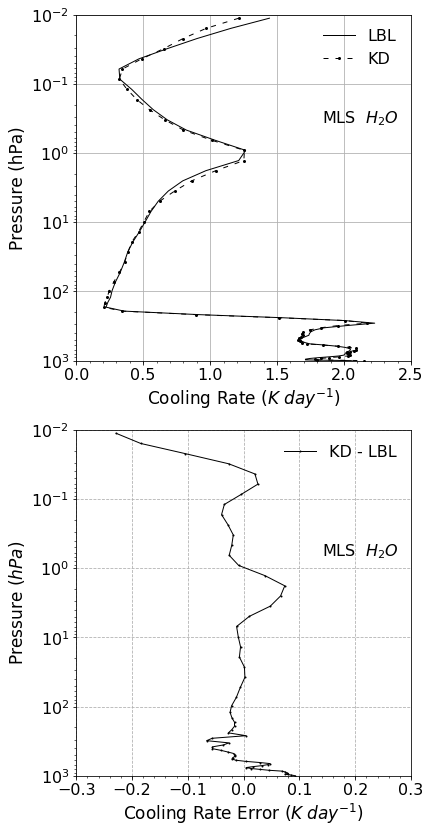

In [9]:
gas, gasname, atmpro, fname = 'h2o', '$H_2O$', 'mls', 'LWpaper_figure02.pdf'


atmcomp = AtmComposition.cliradlw_nongreys(onlygas=gas)

parm_cli = atmcomp.to_cliradparam(atmpro=atmpro, tsfc=ATMPRO[atmpro], commitnumber=COMMITNUMBER)
data_cli = parm_cli.modeldata_pymongo(collection=client.cliradnew.lw)

parms_lbl = atmcomp.to_lblnewparam(nv=1000, dv=.001, atmpro=atmpro, tsfc=ATMPRO[atmpro])
collec = client.lblnew.bestfit_lw
datas_lbl = [parm.modeldata_pymongo(collection=collec) for parm in parms_lbl]
data_lbl = sum(datas_lbl)

cool_crd = data_lbl.crd_cool['coolrg']
cool_cli = data_cli.wgt_cool['coolrg'].sel(i=1).sum('band')

cool_crd = cool_crd[cool_crd.pressure > 1e-2]
cool_cli = cool_cli[cool_cli.pressure > 1e-2]

cool_dif = cool_cli - cool_crd



fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(6, 14))

cool_crd.climaviz.plot(ax=axs[0], index_on_yaxis=True, varlim_from_indexrange=(1e-2, 1e3),
                       yincrease=False, yscale='log',
                       color='black', linestyle='-', linewidth=1, marker=None, markersize=14, alpha=1,
                       label='LBL')
cool_cli.climaviz.plot(ax=axs[0], index_on_yaxis=True, varlim_from_indexrange=(1e-2, 1e3),
                       yincrease=False, yscale='log',
                       color='black', linestyle=(0, (5, 7)), linewidth=1, marker='o', markersize=2, alpha=1,
                       label='KD')
axs[0].grid(b=True, linestyle='-')
axs[0].set_title(None)
axs[0].set_ylabel('Pressure (hPa)', fontsize=17)
axs[0].set_ylim(bottom=1e3, top=1e-2)
axs[0].set_xlabel('Cooling Rate $(K \; day^{-1})$', fontsize=17)
axs[0].set_xlim(left=0, right=2.5)
axs[0].xaxis.set_minor_locator(MultipleLocator(.1))
axs[0].get_xaxis().get_major_formatter().set_scientific(False)
axs[0].tick_params(labelsize=16)
axs[0].legend(loc='best', frameon=False, fontsize=16)
axs[0].text(transform=axs[0].transAxes, x=.85, y=.7, s=f'{atmpro.upper()}  {gasname}', fontsize=16,
           verticalalignment='center', horizontalalignment='center')


cool_dif.climaviz.plot(ax=axs[1], index_on_yaxis=True, varlim_from_indexrange=(1e-2, 1e3),
                       yincrease=False, yscale='log',
                       color='black', linestyle='-', linewidth=1, marker='.', markersize=2, alpha=1,
                       label='KD - LBL')
axs[1].grid(b=True, linestyle='--')
axs[1].set_title(None)
axs[1].set_ylabel('Pressure $(hPa)$', fontsize=17)
axs[1].set_ylim(bottom=1e3, top=1e-2)
axs[1].set_xlabel('Cooling Rate Error $(K \; day^{-1})$', fontsize=17)
axs[1].get_xaxis().get_major_formatter().set_scientific(False)
axs[1].set_xlim(-.3, .3)
axs[1].xaxis.set_minor_locator(MultipleLocator(.02))
axs[1].tick_params(labelsize=16)
axs[1].legend(loc='best', frameon=False, fontsize=16)
axs[1].text(transform=axs[1].transAxes, x=.85, y=.65, s=f'{atmpro.upper()}  {gasname}', fontsize=16,
            verticalalignment='center', horizontalalignment='center')


plt.subplots_adjust(wspace=.3)
fig.savefig(fname, bbox_inches='tight')

## Figure 3

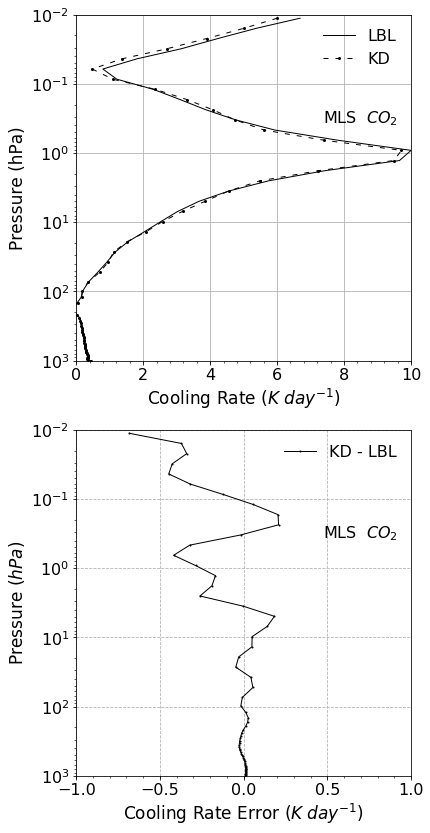

In [10]:
gas, gasname, atmpro, fname = 'co2', '$CO_2$', 'mls', 'LWpaper_figure03.pdf'


atmcomp = AtmComposition.cliradlw_nongreys(onlygas=gas)

parm_cli = atmcomp.to_cliradparam(atmpro=atmpro, tsfc=ATMPRO[atmpro], commitnumber=COMMITNUMBER)
data_cli = parm_cli.modeldata_pymongo(collection=client.cliradnew.lw)

parms_lbl = atmcomp.to_lblnewparam(nv=1000, dv=.001, atmpro=atmpro, tsfc=ATMPRO[atmpro])
collec = client.lblnew.bestfit_lw
datas_lbl = [parm.modeldata_pymongo(collection=collec) for parm in parms_lbl]
data_lbl = sum(datas_lbl)

cool_crd = data_lbl.crd_cool['coolrg']
cool_cli = data_cli.wgt_cool['coolrg'].sel(i=1).sum('band')

cool_crd = cool_crd[cool_crd.pressure > 1e-2]
cool_cli = cool_cli[cool_cli.pressure > 1e-2]

cool_dif = cool_cli - cool_crd



fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(6, 14))

cool_crd.climaviz.plot(ax=axs[0], index_on_yaxis=True, varlim_from_indexrange=(1e-2, 1e3),
                       yincrease=False, yscale='log',
                       color='black', linestyle='-', linewidth=1, marker=None, markersize=14, alpha=1,
                       label='LBL')
cool_cli.climaviz.plot(ax=axs[0], index_on_yaxis=True, varlim_from_indexrange=(1e-2, 1e3),
                       yincrease=False, yscale='log',
                       color='black', linestyle=(0, (5, 7)), linewidth=1, marker='o', markersize=2, alpha=1,
                       label='KD')
axs[0].grid(b=True, linestyle='-')
axs[0].set_title(None)
axs[0].set_ylabel('Pressure (hPa)', fontsize=17)
axs[0].set_ylim(bottom=1e3, top=1e-2)
axs[0].set_xlabel('Cooling Rate $(K \; day^{-1})$', fontsize=17)
axs[0].set_xlim(left=0, right=10)
axs[0].xaxis.set_minor_locator(MultipleLocator(.4))
axs[0].get_xaxis().get_major_formatter().set_scientific(False)
axs[0].tick_params(labelsize=16)
axs[0].legend(loc='best', frameon=False, fontsize=16)
axs[0].text(transform=axs[0].transAxes, x=.85, y=.7, s=f'{atmpro.upper()}  {gasname}', fontsize=16,
           verticalalignment='center', horizontalalignment='center')

cool_dif.climaviz.plot(ax=axs[1], index_on_yaxis=True, varlim_from_indexrange=(1e-2, 1e3),
                       yincrease=False, yscale='log',
                       color='black', linestyle='-', linewidth=1, marker='.', markersize=2, alpha=1,
                       label='KD - LBL')
axs[1].grid(b=True, linestyle='--')
axs[1].set_title(None)
axs[1].set_ylabel('Pressure $(hPa)$', fontsize=17)
axs[1].set_ylim(bottom=1e3, top=1e-2)
axs[1].set_xlabel('Cooling Rate Error $(K \; day^{-1})$', fontsize=17)
axs[1].get_xaxis().get_major_formatter().set_scientific(False)
axs[1].set_xlim(-1., 1.)
axs[1].xaxis.set_minor_locator(MultipleLocator(.1))
axs[1].tick_params(labelsize=16)
axs[1].legend(loc='best', frameon=False, fontsize=16)
axs[1].text(transform=axs[1].transAxes, x=.85, y=.7, s=f'{atmpro.upper()}  {gasname}', fontsize=16,
            verticalalignment='center', horizontalalignment='center')


plt.subplots_adjust(wspace=.3)
fig.savefig(fname, bbox_inches='tight')

## Figure 4

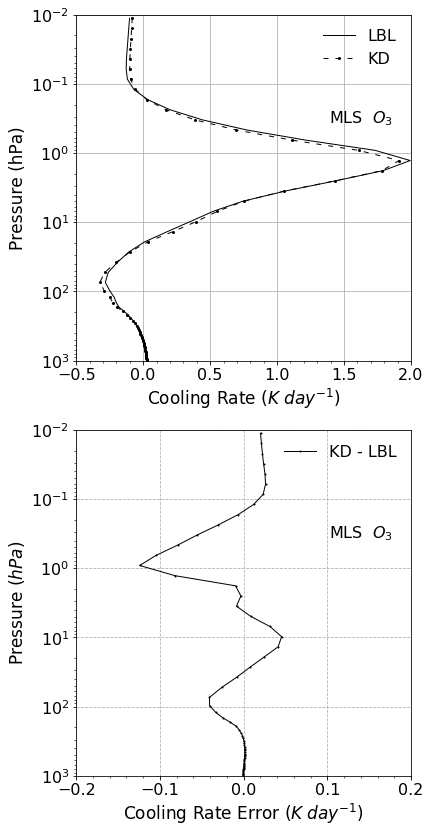

In [11]:
gas, gasname, atmpro, fname = 'o3', '$O_3$', 'mls', 'LWpaper_figure04.pdf'


atmcomp = AtmComposition.cliradlw_nongreys(onlygas=gas)

parm_cli = atmcomp.to_cliradparam(atmpro=atmpro, tsfc=ATMPRO[atmpro], commitnumber=COMMITNUMBER)
data_cli = parm_cli.modeldata_pymongo(collection=client.cliradnew.lw)

parms_lbl = atmcomp.to_lblnewparam(nv=1000, dv=.001, atmpro=atmpro, tsfc=ATMPRO[atmpro])
collec = client.lblnew.bestfit_lw
datas_lbl = [parm.modeldata_pymongo(collection=collec) for parm in parms_lbl]
data_lbl = sum(datas_lbl)

cool_crd = data_lbl.crd_cool['coolrg']
cool_cli = data_cli.wgt_cool['coolrg'].sel(i=1).sum('band')

cool_crd = cool_crd[cool_crd.pressure > 1e-2]
cool_cli = cool_cli[cool_cli.pressure > 1e-2]

cool_dif = cool_cli - cool_crd



fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(6, 14))

cool_crd.climaviz.plot(ax=axs[0], index_on_yaxis=True, varlim_from_indexrange=(1e-2, 1e3),
                       yincrease=False, yscale='log',
                       color='black', linestyle='-', linewidth=1, marker=None, markersize=14, alpha=1,
                       label='LBL')
cool_cli.climaviz.plot(ax=axs[0], index_on_yaxis=True, varlim_from_indexrange=(1e-2, 1e3),
                       yincrease=False, yscale='log',
                       color='black', linestyle=(0, (5, 7)), linewidth=1, marker='o', markersize=2, alpha=1,
                       label='KD')
axs[0].grid(b=True, linestyle='-')
axs[0].set_title(None)
axs[0].set_ylabel('Pressure (hPa)', fontsize=17)
axs[0].set_ylim(bottom=1e3, top=1e-2)
axs[0].set_xlabel('Cooling Rate $(K \; day^{-1})$', fontsize=17)
axs[0].set_xlim(left=-.5, right=2)
axs[0].xaxis.set_minor_locator(MultipleLocator(.1))
axs[0].get_xaxis().get_major_formatter().set_scientific(False)
axs[0].tick_params(labelsize=16)
axs[0].legend(loc='best', frameon=False, fontsize=16)
axs[0].text(transform=axs[0].transAxes, x=.85, y=.7, s=f'{atmpro.upper()}  {gasname}', fontsize=16,
           verticalalignment='center', horizontalalignment='center')

cool_dif.climaviz.plot(ax=axs[1], index_on_yaxis=True, varlim_from_indexrange=(1e-2, 1e3),
                       yincrease=False, yscale='log',
                       color='black', linestyle='-', linewidth=1, marker='.', markersize=2, alpha=1,
                       label='KD - LBL')
axs[1].grid(b=True, linestyle='--')
axs[1].set_title(None)
axs[1].set_ylabel('Pressure $(hPa)$', fontsize=17)
axs[1].set_ylim(bottom=1e3, top=1e-2)
axs[1].set_xlabel('Cooling Rate Error $(K \; day^{-1})$', fontsize=17)
axs[1].get_xaxis().get_major_formatter().set_scientific(False)
axs[1].set_xlim(-.2, .2)
axs[1].xaxis.set_minor_locator(MultipleLocator(.02))
axs[1].tick_params(labelsize=16)
axs[1].legend(loc='best', frameon=False, fontsize=16)
axs[1].text(transform=axs[1].transAxes, x=.85, y=.7, s=f'{atmpro.upper()}  {gasname}', fontsize=16,
            verticalalignment='center', horizontalalignment='center')


plt.subplots_adjust(wspace=.3)
fig.savefig(fname, bbox_inches='tight')

## Figure 5

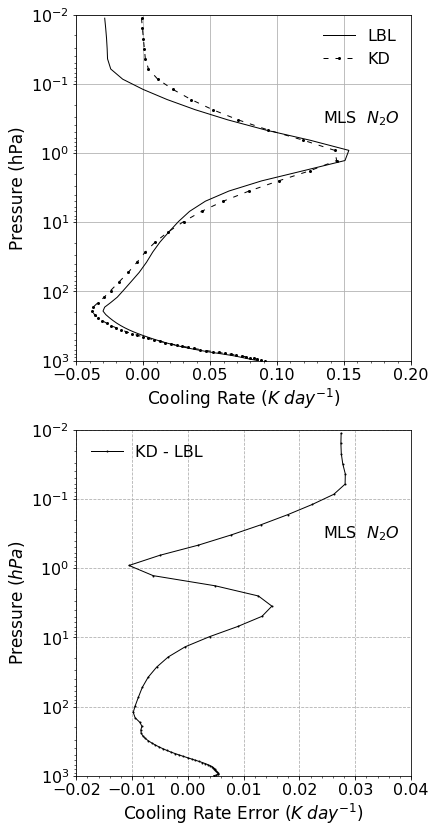

In [13]:
gas, gasname, atmpro, fname = 'n2o', '$N_2O$', 'mls', 'LWpaper_figure05.pdf'


atmcomp = AtmComposition.cliradlw_nongreys(onlygas=gas)

parm_cli = atmcomp.to_cliradparam(atmpro=atmpro, tsfc=ATMPRO[atmpro], commitnumber=COMMITNUMBER)
data_cli = parm_cli.modeldata_pymongo(collection=client.cliradnew.lw)

parms_lbl = atmcomp.to_lblnewparam(nv=1000, dv=.001, atmpro=atmpro, tsfc=ATMPRO[atmpro])
collec = client.lblnew.bestfit_lw
datas_lbl = [parm.modeldata_pymongo(collection=collec) for parm in parms_lbl]
data_lbl = sum(datas_lbl)

cool_crd = data_lbl.crd_cool['coolrg']
cool_cli = data_cli.wgt_cool['coolrg'].sel(i=1).sum('band')

cool_crd = cool_crd[cool_crd.pressure > 1e-2]
cool_cli = cool_cli[cool_cli.pressure > 1e-2]

cool_dif = cool_cli - cool_crd



fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(6, 14))

cool_crd.climaviz.plot(ax=axs[0], index_on_yaxis=True, varlim_from_indexrange=(1e-2, 1e3),
                       yincrease=False, yscale='log',
                       color='black', linestyle='-', linewidth=1, marker=None, markersize=14, alpha=1,
                       label='LBL')
cool_cli.climaviz.plot(ax=axs[0], index_on_yaxis=True, varlim_from_indexrange=(1e-2, 1e3),
                       yincrease=False, yscale='log',
                       color='black', linestyle=(0, (5, 7)), linewidth=1, marker='o', markersize=2, alpha=1,
                       label='KD')
axs[0].grid(b=True, linestyle='-')
axs[0].set_title(None)
axs[0].set_ylabel('Pressure (hPa)', fontsize=17)
axs[0].set_ylim(bottom=1e3, top=1e-2)
axs[0].set_xlabel('Cooling Rate $(K \; day^{-1})$', fontsize=17)
axs[0].set_xlim(left=-.05, right=.20)
axs[0].xaxis.set_minor_locator(MultipleLocator(.01))
axs[0].get_xaxis().get_major_formatter().set_scientific(False)
axs[0].tick_params(labelsize=16)
axs[0].legend(loc='best', frameon=False, fontsize=16)
axs[0].text(transform=axs[0].transAxes, x=.85, y=.7, s=f'{atmpro.upper()}  {gasname}', fontsize=16,
           verticalalignment='center', horizontalalignment='center')


cool_dif.climaviz.plot(ax=axs[1], index_on_yaxis=True, varlim_from_indexrange=(1e-2, 1e3),
                       yincrease=False, yscale='log',
                       color='black', linestyle='-', linewidth=1, marker='.', markersize=2, alpha=1,
                       label='KD - LBL')
axs[1].grid(b=True, linestyle='--')
axs[1].set_title(None)
axs[1].set_ylabel('Pressure $(hPa)$', fontsize=17)
axs[1].set_ylim(bottom=1e3, top=1e-2)
axs[1].set_xlabel('Cooling Rate Error $(K \; day^{-1})$', fontsize=17)
axs[1].get_xaxis().get_major_formatter().set_scientific(False)
axs[1].set_xlim(-.02, .04)
axs[1].xaxis.set_minor_locator(MultipleLocator(.002))
axs[1].tick_params(labelsize=16)
axs[1].legend(loc='best', frameon=False, fontsize=16)
axs[1].text(transform=axs[1].transAxes, x=.85, y=.7, s=f'{atmpro.upper()}  {gasname}', fontsize=16,
            verticalalignment='center', horizontalalignment='center')


plt.subplots_adjust(wspace=.3)
fig.savefig(fname, bbox_inches='tight')

## Figure 6

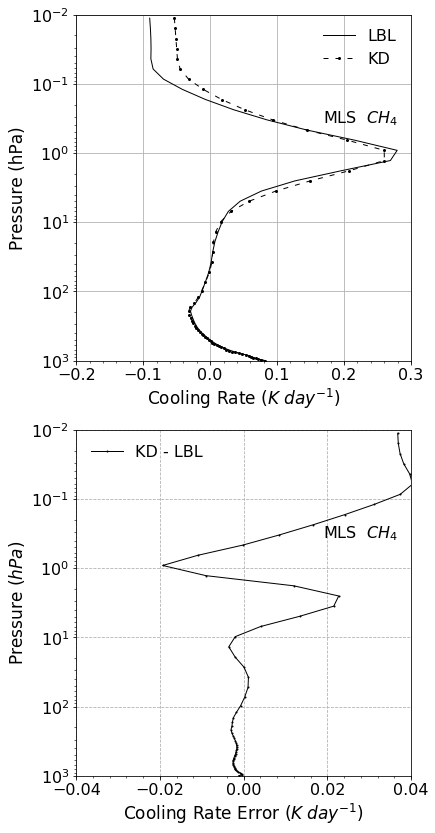

In [15]:
gas, gasname, atmpro, fname = 'ch4', '$CH_4$', 'mls', 'LWpaper_figure06.pdf'


atmcomp = AtmComposition.cliradlw_nongreys(onlygas=gas)

parm_cli = atmcomp.to_cliradparam(atmpro=atmpro, tsfc=ATMPRO[atmpro], commitnumber=COMMITNUMBER)
data_cli = parm_cli.modeldata_pymongo(collection=client.cliradnew.lw)

parms_lbl = atmcomp.to_lblnewparam(nv=1000, dv=.001, atmpro=atmpro, tsfc=ATMPRO[atmpro])
collec = client.lblnew.bestfit_lw
datas_lbl = [parm.modeldata_pymongo(collection=collec) for parm in parms_lbl]
data_lbl = sum(datas_lbl)

cool_crd = data_lbl.crd_cool['coolrg']
cool_cli = data_cli.wgt_cool['coolrg'].sel(i=1).sum('band')

cool_crd = cool_crd[cool_crd.pressure > 1e-2]
cool_cli = cool_cli[cool_cli.pressure > 1e-2]

cool_dif = cool_cli - cool_crd



fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(6, 14))

cool_crd.climaviz.plot(ax=axs[0], index_on_yaxis=True, varlim_from_indexrange=(1e-2, 1e3),
                       yincrease=False, yscale='log',
                       color='black', linestyle='-', linewidth=1, marker=None, markersize=14, alpha=1,
                       label='LBL')
cool_cli.climaviz.plot(ax=axs[0], index_on_yaxis=True, varlim_from_indexrange=(1e-2, 1e3),
                       yincrease=False, yscale='log',
                       color='black', linestyle=(0, (5, 7)), linewidth=1, marker='o', markersize=2, alpha=1,
                       label='KD')
axs[0].grid(b=True, linestyle='-')
axs[0].set_title(None)
axs[0].set_ylabel('Pressure (hPa)', fontsize=17)
axs[0].set_ylim(bottom=1e3, top=1e-2)
axs[0].set_xlabel('Cooling Rate $(K \; day^{-1})$', fontsize=17)
axs[0].set_xlim(left=-.2, right=.3)
axs[0].xaxis.set_minor_locator(MultipleLocator(.02))
axs[0].get_xaxis().get_major_formatter().set_scientific(False)
axs[0].tick_params(labelsize=16)
axs[0].legend(loc='best', frameon=False, fontsize=16)
axs[0].text(transform=axs[0].transAxes, x=.85, y=.7, s=f'{atmpro.upper()}  {gasname}', fontsize=16,
           verticalalignment='center', horizontalalignment='center')

cool_dif.climaviz.plot(ax=axs[1], index_on_yaxis=True, varlim_from_indexrange=(1e-2, 1e3),
                       yincrease=False, yscale='log',
                       color='black', linestyle='-', linewidth=1, marker='.', markersize=2, alpha=1,
                       label='KD - LBL')
axs[1].grid(b=True, linestyle='--')
axs[1].set_title(None)
axs[1].set_ylabel('Pressure $(hPa)$', fontsize=17)
axs[1].set_ylim(bottom=1e3, top=1e-2)
axs[1].set_xlabel('Cooling Rate Error $(K \; day^{-1})$', fontsize=17)
axs[1].get_xaxis().get_major_formatter().set_scientific(False)
axs[1].set_xlim(-.04, .04)
axs[1].xaxis.set_minor_locator(MultipleLocator(.004))
axs[1].tick_params(labelsize=16)
axs[1].legend(loc='best', frameon=False, fontsize=16)
axs[1].text(transform=axs[1].transAxes, x=.85, y=.7, s=f'{atmpro.upper()}  {gasname}', fontsize=16,
            verticalalignment='center', horizontalalignment='center')


plt.subplots_adjust(wspace=.3)
fig.savefig(fname, bbox_inches='tight')

# Figures 7, 8 and 9

##  Figure 7

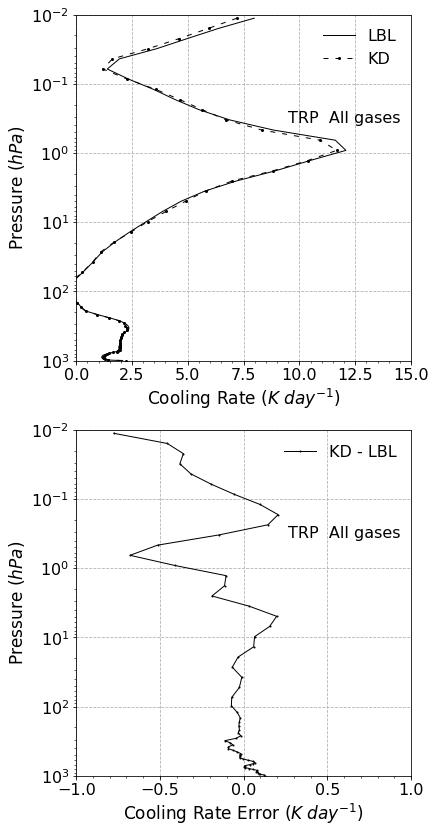

In [16]:
atmpro, fname = 'trp', 'LWpaper_figure07.pdf'

atmcomp = AtmComposition.cliradlw_nongreys()

parm_cli = atmcomp.to_cliradparam(atmpro=atmpro, tsfc=ATMPRO[atmpro], commitnumber=COMMITNUMBER)
data_cli = parm_cli.modeldata_pymongo(collection=client.cliradnew.lw)

parms_lbl = atmcomp.to_lblnewparam(atmpro=atmpro, tsfc=ATMPRO[atmpro], bestfit_values=True)
collecs = [client.lblnew.bestfit_lw if p.model_name=='lblnew-bestfit' 
           else client.lblnew.overlap_lw for p in parms_lbl]
datas_lbl = [parm.modeldata_pymongo(collection=collec) for parm, collec in zip(parms_lbl, collecs)]
data_lbl = sum(datas_lbl)

cool_crd = data_lbl.crd_cool['coolrg']
cool_cli = data_cli.wgt_cool['coolrg'].sel(i=1).sum('band')

cool_crd = cool_crd[cool_crd.pressure > 1e-2]
cool_cli = cool_cli[cool_cli.pressure > 1e-2]

cool_dif = cool_cli - cool_crd


fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(6, 14))

cool_crd.climaviz.plot(ax=axs[0], index_on_yaxis=True, varlim_from_indexrange=(1e-2, 1e3),
                       yincrease=False, yscale='log',
                       color='black', linestyle='-', linewidth=1, marker=None, markersize=12, alpha=1,
                       label='LBL')

cool_cli.climaviz.plot(ax=axs[0], index_on_yaxis=True, varlim_from_indexrange=(1e-2, 1e3),
                       yincrease=False, yscale='log',
                       color='black', linestyle=(0, (5, 7)), linewidth=1, marker='o', markersize=2, alpha=1,
                       label='KD')
axs[0].grid(b=True, linestyle='--')
axs[0].set_title(None)
axs[0].set_ylabel('Pressure $(hPa)$', fontsize=17)
axs[0].set_ylim(top=1e-2, bottom=1e3)
axs[0].set_xlabel('Cooling Rate $(K \; day^{-1})$', fontsize=17)
axs[0].set_xlim(left=0, right=15)
axs[0].get_xaxis().get_major_formatter().set_scientific(False)
axs[0].get_xaxis().set_minor_locator(MultipleLocator(.5))
axs[0].tick_params(labelsize=16)
axs[0].legend(frameon=False, fontsize=16)
axs[0].text(transform=axs[0].transAxes, x=.8, y=.7, s=f'{atmpro.upper()}  All gases', fontsize=16,
           verticalalignment='center', horizontalalignment='center')


cool_dif.climaviz.plot(ax=axs[1], index_on_yaxis=True, varlim_from_indexrange=(1e-2, 1e3),
                       yincrease=False, yscale='log',
                       color='black', linestyle='-', linewidth=1, marker='.', markersize=2, alpha=1,
                       label='KD - LBL')
axs[1].grid(b=True, linestyle='--')
axs[1].set_title(None)
axs[1].set_ylabel('Pressure $(hPa)$', fontsize=17)
axs[1].set_ylim(bottom=1e3, top=1e-2)
axs[1].set_xlabel('Cooling Rate Error $(K \; day^{-1})$', fontsize=17)
axs[1].get_xaxis().get_major_formatter().set_scientific(False)
axs[1].set_xlim(left=-1, right=1)
axs[1].get_xaxis().set_minor_locator(MultipleLocator(.1))
axs[1].tick_params(labelsize=16)
axs[1].legend(frameon=False, fontsize=16)
axs[1].text(transform=axs[1].transAxes, x=.8, y=.7, s=f'{atmpro.upper()}  All gases', fontsize=16,
            verticalalignment='center', horizontalalignment='center')

fig.savefig(fname, bbox_inches='tight')

## Figure 8

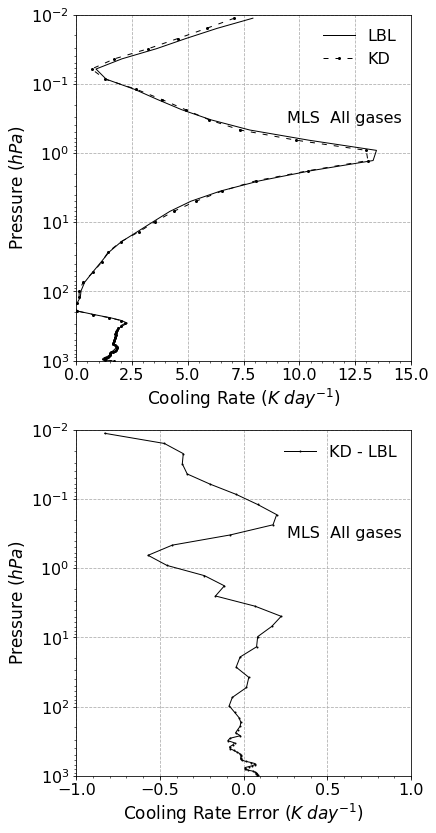

In [17]:
atmpro, fname = 'mls', 'LWpaper_figure08.pdf'

atmcomp = AtmComposition.cliradlw_nongreys()

parm_cli = atmcomp.to_cliradparam(atmpro=atmpro, tsfc=ATMPRO[atmpro], commitnumber=COMMITNUMBER)
data_cli = parm_cli.modeldata_pymongo(collection=client.cliradnew.lw)

parms_lbl = atmcomp.to_lblnewparam(bestfit_values=True, atmpro=atmpro, tsfc=ATMPRO[atmpro])
collecs = [client.lblnew.bestfit_lw if p.model_name=='lblnew-bestfit' 
           else client.lblnew.overlap_lw for p in parms_lbl]
datas_lbl = [parm.modeldata_pymongo(collection=collec) for parm, collec in zip(parms_lbl, collecs)]
data_lbl = sum(datas_lbl)

cool_crd = data_lbl.crd_cool['coolrg']
cool_cli = data_cli.wgt_cool['coolrg'].sel(i=1).sum('band')

cool_crd = cool_crd[cool_crd.pressure > 1e-2]
cool_cli = cool_cli[cool_cli.pressure > 1e-2]

cool_dif = cool_cli - cool_crd


fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(6, 14))

cool_crd.climaviz.plot(ax=axs[0], index_on_yaxis=True, varlim_from_indexrange=(1e-2, 1e3),
                       yincrease=False, yscale='log',
                       color='black', linestyle='-', linewidth=1, marker=None, markersize=12, alpha=1,
                       label='LBL')

cool_cli.climaviz.plot(ax=axs[0], index_on_yaxis=True, varlim_from_indexrange=(1e-2, 1e3),
                       yincrease=False, yscale='log',
                       color='black', linestyle=(0, (5, 7)), linewidth=1, marker='o', markersize=2, alpha=1,
                       label='KD')
axs[0].grid(b=True, linestyle='--')
axs[0].set_title(None)
axs[0].set_ylabel('Pressure $(hPa)$', fontsize=17)
axs[0].set_ylim(top=1e-2, bottom=1e3)
axs[0].set_xlabel('Cooling Rate $(K \; day^{-1})$', fontsize=17)
axs[0].set_xlim(left=0, right=15)
axs[0].get_xaxis().get_major_formatter().set_scientific(False)
axs[0].get_xaxis().set_minor_locator(MultipleLocator(.5))
axs[0].tick_params(labelsize=16)
axs[0].legend(frameon=False, fontsize=16)
axs[0].text(transform=axs[0].transAxes, x=.8, y=.7, s=f'{atmpro.upper()}  All gases', fontsize=16,
           verticalalignment='center', horizontalalignment='center')


cool_dif.climaviz.plot(ax=axs[1], index_on_yaxis=True, varlim_from_indexrange=(1e-2, 1e3),
                       yincrease=False, yscale='log',
                       color='black', linestyle='-', linewidth=1, marker='.', markersize=2, alpha=1,
                       label='KD - LBL')
axs[1].grid(b=True, linestyle='--')
axs[1].set_title(None)
axs[1].set_ylabel('Pressure $(hPa)$', fontsize=17)
axs[1].set_ylim(bottom=1e3, top=1e-2)
axs[1].set_xlabel('Cooling Rate Error $(K \; day^{-1})$', fontsize=17)
axs[1].get_xaxis().get_major_formatter().set_scientific(False)
axs[1].set_xlim(left=-1, right=1)
axs[1].get_xaxis().set_minor_locator(MultipleLocator(.1))
axs[1].tick_params(labelsize=16)
axs[1].legend(frameon=False, fontsize=16)
axs[1].text(transform=axs[1].transAxes, x=.8, y=.7, s=f'{atmpro.upper()}  All gases', fontsize=16,
            verticalalignment='center', horizontalalignment='center')

fig.savefig(fname, bbox_inches='tight')

## Figure 9

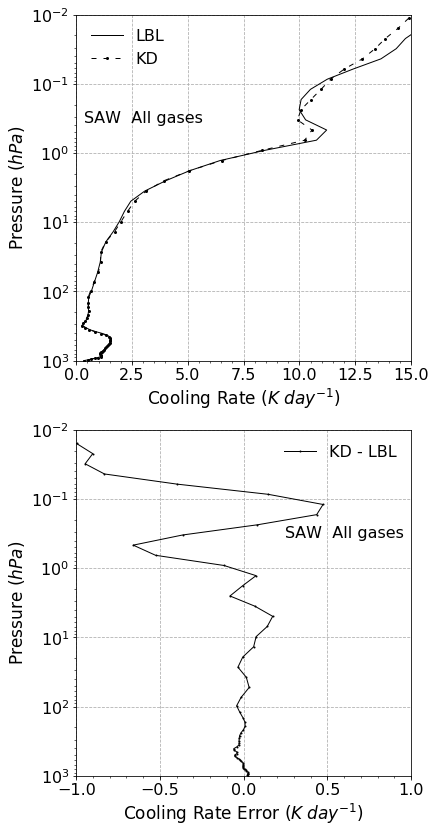

In [18]:
atmpro, fname = 'saw', 'LWpaper_figure09.pdf'

atmcomp = AtmComposition.cliradlw_nongreys()

parm_cli = atmcomp.to_cliradparam(atmpro=atmpro, tsfc=ATMPRO[atmpro], commitnumber=COMMITNUMBER)
data_cli = parm_cli.modeldata_pymongo(collection=client.cliradnew.lw)

parms_lbl = atmcomp.to_lblnewparam(nv=1000, dv=0.001, atmpro=atmpro, tsfc=ATMPRO[atmpro])
collecs = [client.lblnew.bestfit_lw if parm.model_name == 'lblnew-bestfit' else 
           client.lblnew.overlap_lw for parm in parms_lbl]
datas_lbl = [parm.modeldata_pymongo(collection=collec) for parm, collec in zip(parms_lbl, collecs)]
data_lbl = sum(datas_lbl)

cool_crd = data_lbl.crd_cool['coolrg']
cool_cli = data_cli.wgt_cool['coolrg'].sel(i=1).sum('band')

cool_crd = cool_crd[cool_crd.pressure > 1e-2]
cool_cli = cool_cli[cool_cli.pressure > 1e-2]

cool_dif = cool_cli - cool_crd


fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(6, 14))

cool_crd.climaviz.plot(ax=axs[0], index_on_yaxis=True, varlim_from_indexrange=(1e-2, 1e3),
                       yincrease=False, yscale='log',
                       color='black', linestyle='-', linewidth=1, marker=None, markersize=12, alpha=1,
                       label='LBL')

cool_cli.climaviz.plot(ax=axs[0], index_on_yaxis=True, varlim_from_indexrange=(1e-2, 1e3),
                       yincrease=False, yscale='log',
                       color='black', linestyle=(0, (5, 7)), linewidth=1, marker='o', markersize=2, alpha=1,
                       label='KD')
axs[0].grid(b=True, linestyle='--')
axs[0].set_title(None)
axs[0].set_ylabel('Pressure $(hPa)$', fontsize=17)
axs[0].set_ylim(top=1e-2, bottom=1e3)
axs[0].set_xlabel('Cooling Rate $(K \; day^{-1})$', fontsize=17)
axs[0].set_xlim(left=0, right=15)
axs[0].get_xaxis().get_major_formatter().set_scientific(False)
axs[0].get_xaxis().set_minor_locator(MultipleLocator(.5))
axs[0].tick_params(labelsize=16)
axs[0].legend(frameon=False, fontsize=16)
axs[0].text(transform=axs[0].transAxes, x=.2, y=.7, s=f'{atmpro.upper()}  All gases', fontsize=16,
           verticalalignment='center', horizontalalignment='center')


cool_dif.climaviz.plot(ax=axs[1], index_on_yaxis=True, varlim_from_indexrange=(1e-2, 1e3),
                       yincrease=False, yscale='log',
                       color='black', linestyle='-', linewidth=1, marker='.', markersize=2, alpha=1,
                       label='KD - LBL')
axs[1].grid(b=True, linestyle='--')
axs[1].set_title(None)
axs[1].set_ylabel('Pressure $(hPa)$', fontsize=17)
axs[1].set_ylim(bottom=1e3, top=1e-2)
axs[1].set_xlabel('Cooling Rate Error $(K \; day^{-1})$', fontsize=17)
axs[1].get_xaxis().get_major_formatter().set_scientific(False)
axs[1].set_xlim(left=-1, right=1)
axs[1].get_xaxis().set_minor_locator(MultipleLocator(.1))
axs[1].tick_params(labelsize=16)
axs[1].legend(frameon=False, fontsize=16)
axs[1].text(transform=axs[1].transAxes, x=.8, y=.7, s=f'{atmpro.upper()}  All gases', fontsize=16,
            verticalalignment='center', horizontalalignment='center')

fig.savefig(fname, bbox_inches='tight')

# --

In [105]:
display.HTML('''<script>                                                                                             
code_show=true;                                                                                                      
function code_toggle() {                                                                                             
 if (code_show){                                                                                                     
 $('div.input').hide();                                                                                              
 } else {                                                                                                            
 $('div.input').show();                                                                                              
 }                                                                                                                   
 code_show = !code_show                                                                                              
}                                                                                                                    
$( document ).ready(code_toggle);                                                                                    
</script>                                                                                                            
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></for\
m>''')